In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_all_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        44.5841 (43.0113, 45.1836) (43.3995, 45.2000)  1.8005 (Jnode 202)\n',
 't_n104        30.1643 (27.0642, 32.6256) (27.2572, 32.7641)  5.5069 (Jnode 201)\n',
 't_n105        29.3400 (26.3089, 31.8102) (26.5527, 32.0045)  5.4518 (Jnode 200)\n',
 't_n106        26.6058 (23.7985, 29.1049) (23.9379, 29.2130)  5.2752 (Jnode 199)\n',
 't_n107        25.9198 (23.1818, 28.4000) (23.2825, 28.4783)  5.1958 (Jnode 198)\n',
 't_n108        24.5741 (21.9601, 27.0319) (22.0410, 27.0949)  5.0539 (Jnode 197)\n',
 't_n109        12.3685 (11.1298, 14.2890) (10.9757, 14.0167)  3.0410 (Jnode 196)\n',
 't_n110        12.2653 (11.0409, 14.1706) (10.8726, 13.8884)  3.0158 (Jnode 195)\n',
 't_n111        11.9256 (10.7473, 13.7793) (10.5825, 13.4979)  2.9154 (Jnode 194)\n',
 't_n112        11.5082 (10.3818, 13.2926) (10.2471, 13.0541)  2.8071 (Jnode 193)\n',
 't_n113        10.9435 ( 9.8983, 12.6300) ( 9.7868, 12.4223)  2.6355 (Jnode 192)\n',
 't_n114         7.3933 ( 6.5125,  8.6378) ( 6.4244,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_iqtree.append(float(line[3][1:-1]))
    else:
        lower_ci_iqtree.append(float(line[3][1:-1]))
    if line[4].startswith('('):
        upper_ci_iqtree.append(float(line[4][1:-1]))
    else:
        upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))

for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[44.5841,
 30.1643,
 29.34,
 26.6058,
 25.9198,
 24.5741,
 12.3685,
 12.2653,
 11.9256,
 11.5082,
 10.9435,
 7.3933,
 4.3603,
 2.5225,
 2.0341,
 8.233,
 7.0607,
 11.4258,
 7.2329,
 10.9752,
 8.7631,
 7.1217,
 5.9025,
 10.6738,
 10.0686,
 2.6859,
 11.7951,
 10.6995,
 8.2873,
 6.6436,
 7.3271,
 6.6677,
 5.577,
 5.4048,
 23.0795,
 18.6741,
 24.8418,
 22.9082,
 21.4614,
 17.9265,
 9.5769,
 17.2728,
 15.2106,
 13.5367,
 11.5694,
 20.9255,
 19.3669,
 5.107,
 2.2834,
 27.8131,
 26.3658,
 24.0558,
 23.2805,
 24.9789,
 17.3134,
 20.9687,
 16.9108,
 29.3786,
 27.7548,
 25.4249,
 24.1328,
 20.6727,
 13.6884,
 18.4358,
 25.0571,
 8.0265,
 25.2869,
 35.5309,
 34.7533,
 34.1168,
 32.6557,
 30.198,
 28.8814,
 27.8708,
 26.6663,
 23.7964,
 20.6855,
 17.3229,
 24.1663,
 22.8058,
 18.1956,
 20.5997,
 26.1784,
 24.1413,
 22.3096,
 19.0631,
 13.0416,
 24.7082,
 22.1768,
 19.5946,
 28.7942,
 27.3704,
 26.0016,
 23.0662,
 17.022,
 25.7675,
 17.5425,
 14.2779,
 5.7403,
 34.5294,
 30.1321]

In [7]:
lower_ci_iqtree

[5.1836,
 2.6256,
 1.8102,
 9.1049,
 8.4,
 7.0319,
 4.289,
 4.1706,
 3.7793,
 3.2926,
 0.8983,
 0.5125,
 0.208,
 0.367,
 0.3821,
 0.0717,
 0.9063,
 3.2041,
 0.8612,
 0.8761,
 0.6004,
 0.9183,
 0.4904,
 0.4688,
 0.8831,
 0.6728,
 3.6323,
 0.5272,
 0.9888,
 0.3496,
 0.1967,
 0.5795,
 0.5758,
 0.9223,
 5.5851,
 1.7079,
 7.3217,
 5.4571,
 4.0756,
 0.8012,
 0.3509,
 0.3018,
 8.3551,
 6.7001,
 0.823,
 3.6571,
 2.275,
 0.4401,
 0.0222,
 0.3429,
 9.0141,
 7.0658,
 6.4673,
 7.769,
 1.3089,
 4.2448,
 0.6471,
 1.8951,
 0.3622,
 8.2302,
 7.0729,
 3.9207,
 8.0948,
 1.877,
 8.0418,
 0.5546,
 8.4119,
 7.2394,
 6.2265,
 5.4555,
 3.7111,
 1.461,
 0.2971,
 9.3853,
 8.3145,
 5.8742,
 3.1844,
 0.285,
 6.1489,
 4.943,
 1.0615,
 3.0723,
 7.885,
 6.1054,
 4.52,
 1.6932,
 6.6082,
 6.6114,
 4.4381,
 2.2529,
 0.2431,
 9.051,
 7.9407,
 5.5846,
 0.6642,
 7.8642,
 1.0909,
 7.9178,
 0.2837,
 6.3689,
 2.5491]

In [8]:
upper_ci_iqtree

[43.3995,
 27.2572,
 26.5527,
 23.9379,
 23.2825,
 22.041,
 10.9757,
 10.8726,
 10.5825,
 10.2471,
 12.63,
 8.6378,
 4.7811,
 2.7386,
 2.8771,
 9.6696,
 8.378,
 10.1623,
 8.9665,
 12.6836,
 10.2717,
 8.4992,
 7.6578,
 12.4391,
 11.7871,
 4.0266,
 10.4418,
 12.3531,
 9.7519,
 8.0203,
 8.3187,
 7.6545,
 6.5684,
 7.3247,
 20.5072,
 15.4504,
 22.2855,
 20.2995,
 18.8172,
 14.9477,
 12.9305,
 14.1462,
 12.0336,
 10.5059,
 14.6472,
 18.1593,
 16.4605,
 8.0722,
 4.0073,
 25.0119,
 23.5179,
 20.9502,
 19.966,
 21.9622,
 12.3292,
 17.3521,
 12.5537,
 26.4865,
 24.8244,
 22.3943,
 21.0433,
 17.3778,
 10.2697,
 15.1063,
 21.8191,
 12.4723,
 21.887,
 34.1811,
 33.6635,
 33.1674,
 32.26,
 28.8098,
 27.31,
 26.2007,
 24.7783,
 21.4787,
 17.9051,
 13.9917,
 21.9989,
 20.4842,
 14.9398,
 17.9497,
 24.3038,
 22.0348,
 20.0116,
 16.5137,
 10.3262,
 22.6326,
 19.7645,
 16.8702,
 27.1933,
 25.4501,
 23.7527,
 20.0896,
 12.3667,
 23.2597,
 13.9948,
 10.6896,
 8.4582,
 32.8554,
 26.9139]

In [9]:
file_LG = open("LG_all_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_baseml.append(float(line[3][1:-1]))
    else:
         lower_ci_baseml.append(float(line[3][:-1]))
    if line[4].startswith('('):
        upper_ci_baseml.append(float(line[4][1:-1]))
    else:
         upper_ci_baseml.append(float(line[4][:-1]))
        
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

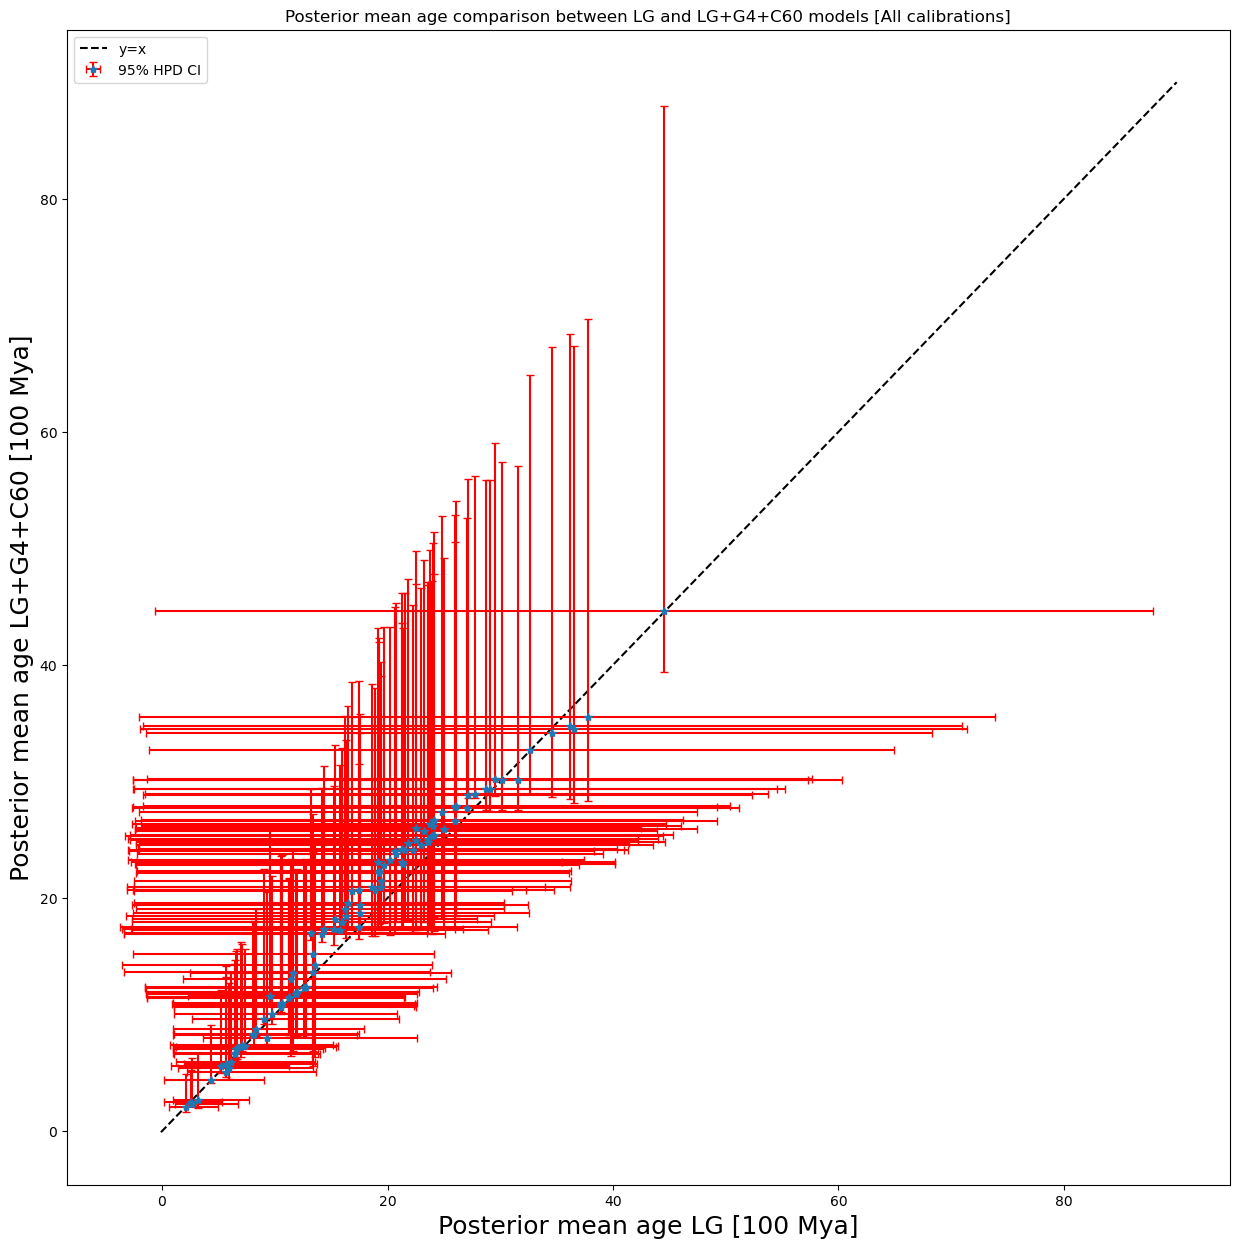

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,90], 
        [-0.1, 90], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C60 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 models [All calibrations]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C60_all.png')

In [11]:
posterior_mean_baseml

[44.5673,
 30.1583,
 28.6943,
 25.9474,
 25.0059,
 22.9499,
 12.8087,
 12.6316,
 11.9728,
 11.2926,
 10.5907,
 7.1124,
 4.3467,
 2.543,
 2.1501,
 8.0516,
 6.597,
 11.2819,
 7.0013,
 10.666,
 8.3757,
 6.656,
 6.1265,
 10.5905,
 9.7827,
 3.2102,
 11.8992,
 10.5482,
 8.1683,
 6.4756,
 7.3175,
 6.43,
 5.1949,
 5.9175,
 21.2449,
 17.5645,
 23.5711,
 21.3474,
 19.4127,
 15.9578,
 9.04,
 15.7839,
 13.4177,
 11.5856,
 9.5569,
 19.4181,
 17.598,
 5.6858,
 2.6609,
 25.9933,
 23.7294,
 20.6434,
 20.2389,
 22.5349,
 15.2175,
 18.5787,
 14.1599,
 29.1063,
 27.066,
 24.1588,
 22.2232,
 18.9235,
 13.4049,
 16.3075,
 23.6073,
 9.3301,
 23.979,
 37.8006,
 36.1629,
 34.6319,
 32.6762,
 29.5457,
 27.7272,
 26.1164,
 24.129,
 20.7887,
 17.4738,
 14.3767,
 21.3203,
 19.6819,
 15.3836,
 16.8068,
 24.0377,
 21.5597,
 19.2484,
 16.2564,
 11.4024,
 21.8161,
 19.2747,
 16.4718,
 27.1253,
 24.8381,
 22.4999,
 19.154,
 13.2555,
 23.2521,
 17.4999,
 13.5845,
 5.6624,
 36.5469,
 31.5972]

In [12]:
posterior_mean_iqtree

[44.5841,
 30.1643,
 29.34,
 26.6058,
 25.9198,
 24.5741,
 12.3685,
 12.2653,
 11.9256,
 11.5082,
 10.9435,
 7.3933,
 4.3603,
 2.5225,
 2.0341,
 8.233,
 7.0607,
 11.4258,
 7.2329,
 10.9752,
 8.7631,
 7.1217,
 5.9025,
 10.6738,
 10.0686,
 2.6859,
 11.7951,
 10.6995,
 8.2873,
 6.6436,
 7.3271,
 6.6677,
 5.577,
 5.4048,
 23.0795,
 18.6741,
 24.8418,
 22.9082,
 21.4614,
 17.9265,
 9.5769,
 17.2728,
 15.2106,
 13.5367,
 11.5694,
 20.9255,
 19.3669,
 5.107,
 2.2834,
 27.8131,
 26.3658,
 24.0558,
 23.2805,
 24.9789,
 17.3134,
 20.9687,
 16.9108,
 29.3786,
 27.7548,
 25.4249,
 24.1328,
 20.6727,
 13.6884,
 18.4358,
 25.0571,
 8.0265,
 25.2869,
 35.5309,
 34.7533,
 34.1168,
 32.6557,
 30.198,
 28.8814,
 27.8708,
 26.6663,
 23.7964,
 20.6855,
 17.3229,
 24.1663,
 22.8058,
 18.1956,
 20.5997,
 26.1784,
 24.1413,
 22.3096,
 19.0631,
 13.0416,
 24.7082,
 22.1768,
 19.5946,
 28.7942,
 27.3704,
 26.0016,
 23.0662,
 17.022,
 25.7675,
 17.5425,
 14.2779,
 5.7403,
 34.5294,
 30.1321]

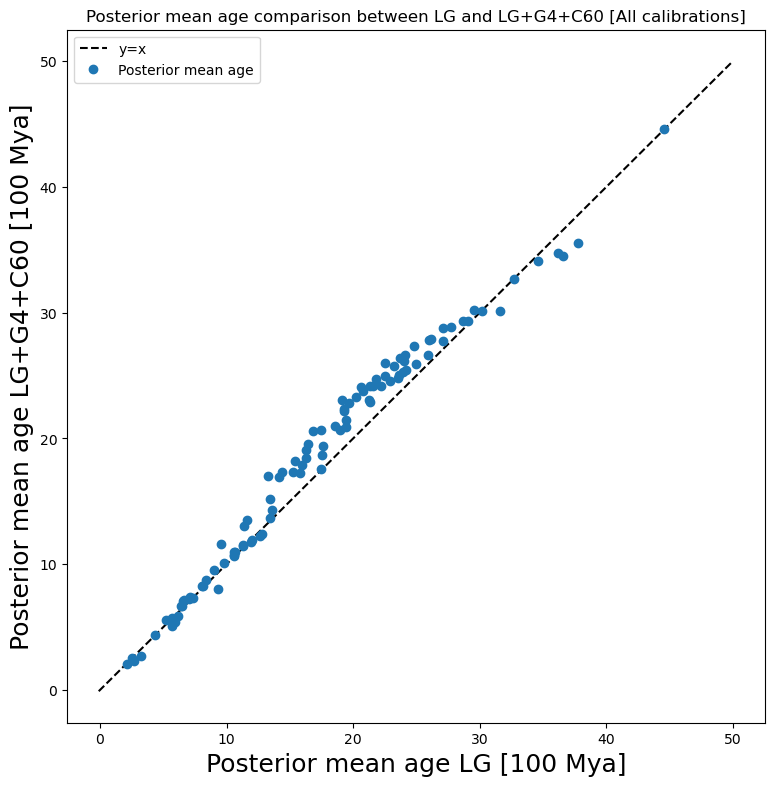

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C60 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 [All calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C60_all_scatter.png')

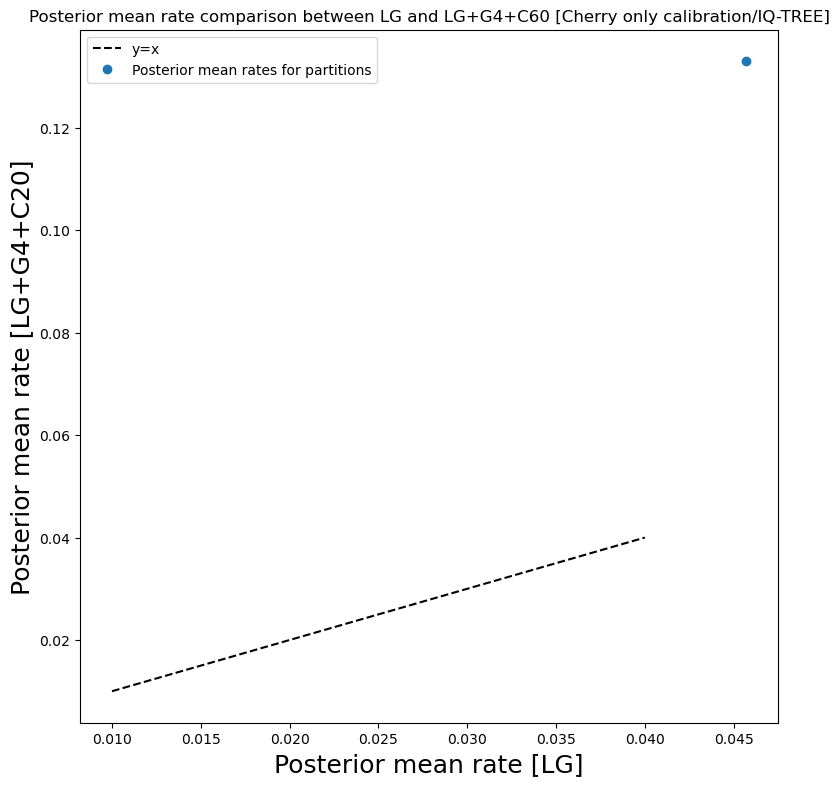

In [14]:
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([0.01,0.04], 
        [0.01, 0.04], 
        'k--', label='y=x')
ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
 
# Labels and title
ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
ax.set_ylabel('Posterior mean rate [LG+G4+C20]', fontsize=18)
ax.set_title('Posterior mean rate comparison between LG and LG+G4+C60 [Cherry only calibration/IQ-TREE]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_C20_all_scatter.png')